# SONAR Rock vs. Mine Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Loading dataset

In [2]:
sonar_data = pd.read_csv("C:/Users/User/Downloads/Sonar Data.csv", header=None)

In [3]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021,M
190,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024,M
191,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055,M
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,M


In [4]:
sonar_data.shape

(194, 61)

In [5]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.029401,0.038957,0.044611,0.055016,0.076579,0.105592,0.121964,0.134446,0.177152,0.205201,...,0.016108,0.013527,0.010974,0.011215,0.009636,0.008422,0.008028,0.008172,0.008156,0.006549
std,0.023559,0.033743,0.039559,0.047690,0.056719,0.060164,0.063110,0.087553,0.121765,0.138003,...,0.012323,0.009934,0.007195,0.007360,0.007204,0.005845,0.005887,0.006568,0.006231,0.005094
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001100,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013425,0.016525,0.018850,0.024325,0.038425,0.067275,0.077975,0.077325,0.094925,0.105700,...,0.008125,0.007125,0.005250,0.005625,0.004425,0.004525,0.003700,0.003600,0.004300,0.003125
50%,0.022400,0.029850,0.034500,0.044450,0.063000,0.092150,0.106950,0.111200,0.145950,0.176000,...,0.013700,0.011100,0.009950,0.009550,0.007900,0.007200,0.006350,0.006050,0.006800,0.005350
75%,0.036050,0.050450,0.060275,0.068875,0.105875,0.139750,0.154200,0.170950,0.235900,0.271250,...,0.021225,0.017275,0.015175,0.014500,0.012400,0.011325,0.010575,0.010500,0.010575,0.008575
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


R => Rock

M => Mine

In [6]:
sonar_data[60].value_counts()

R    97
M    97
Name: 60, dtype: int64

### Visualizing Data 

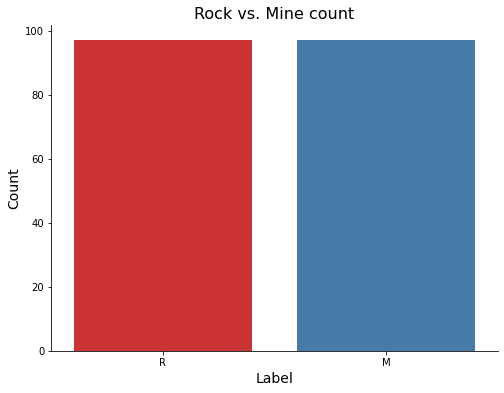

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=sonar_data[60], palette="Set1")
plt.title("Rock vs. Mine count", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.036303,0.047610,0.053271,0.068585,0.091131,0.114961,0.129748,0.151296,0.216911,0.251077,...,0.019905,0.016602,0.012308,0.012912,0.010704,0.009413,0.008242,0.009667,0.009233,0.007074
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### Separating Features and Label

In [9]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0158,0.0239,0.0150,0.0494,0.0988,0.1425,0.1463,0.1219,0.1697,0.1923,...,0.0223,0.0121,0.0108,0.0057,0.0028,0.0079,0.0034,0.0046,0.0022,0.0021
190,0.0156,0.0210,0.0282,0.0596,0.0462,0.0779,0.1365,0.0780,0.1038,0.1567,...,0.0189,0.0150,0.0060,0.0082,0.0091,0.0038,0.0056,0.0056,0.0048,0.0024
191,0.0315,0.0252,0.0167,0.0479,0.0902,0.1057,0.1024,0.1209,0.1241,0.1533,...,0.0138,0.0108,0.0062,0.0044,0.0072,0.0007,0.0054,0.0035,0.0001,0.0055
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0185,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007


In [11]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
189    M
190    M
191    M
192    M
193    M
Name: 60, Length: 194, dtype: object

### Splitting the dataset 

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)

In [13]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (174, 60)
Y_train shape: (174,)
X_test shape: (20, 60)
Y_test shape: (20,)


### Model Evaluation

In [14]:
# Using RandomForest Classifier
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)

In [15]:
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

Training Accuracy

In [16]:
# Evaluate the RandomForest Classifier on training data
y_pred_train = rf_clf.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0


Testing Accuracy

In [17]:
# Evaluate the RandomForest Classifier on testing data
y_pred_test = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.95


### Confusion Matrix 

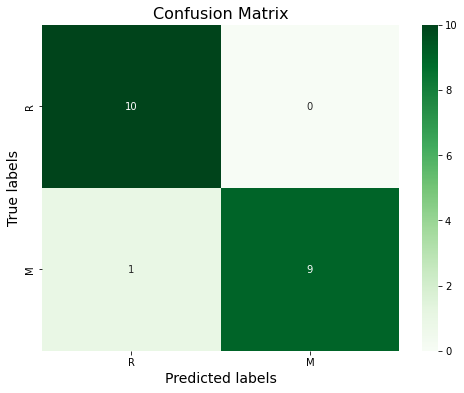

In [19]:
cm = confusion_matrix(Y_test, y_pred_test)
class_names = ['R', 'M']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Making Predictions 

In [34]:
# Take input_data as user input
input_data = input("Enter the features: ")
input_data = input_data.split(',')
input_data = [float(value) for value in input_data]

# Reshape the input data
preprocessed_input_data = np.array(input_data).reshape(1, -1)

# Make prediction
prediction = rf_clf.predict(preprocessed_input_data)

# Display the prediction
if prediction[0] == 'R':
    print("\n\033[1mIt's a Rock")
else:
    print("\n\033[1mIt's a Mine")

Enter the features: 0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,0.6333,0.706,0.5544,0.532,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.507,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.013,0.0106,0.0033,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078

It's a Rock
